# Part I - Ford GoBike System Data.
## by Mohammed Suara

## Introduction
> Ford Go Bike is a regional public bicycle sharing system in California's San Francisco Bay Area in a partnership with Ford Motor Company.
> Ford GoBike consists of a fleet of bikes that can be unlocked in one station and returned in any other network station. Thus, this is ideal for one-way trips. These bikes are available for use thorughout the year and riders have access to all bikes in the network.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('bike_data.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# high-level overview of data shape and composition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
# drop rows with null/incomplete data

df.dropna(inplace=True)

In [6]:
# convert duration_sec to minutes by dividing by 60

df['duration_min'] = (df['duration_sec'] / 60).astype(int)

In [7]:
# convert start_time and end_time to datetime datatype

df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])


In [8]:
#  derive hour of the day, day of the week and month of the year from start_time and end_time

# deriving the hour of the day 
df['start_hour'] = df['start_time'].dt.hour
df['end_hour'] = df['end_time'].dt.hour

# deriving the 'full' name of the day of the week the trip took place
df['start_day'] = df['start_time'].dt.strftime('%A')
df['end_day'] = df['end_time'].dt.strftime('%A')

# deriving the 'full' name of the month of the year the trip took place
df['start_month'] = df['start_time'].dt.strftime('%B')
df['end_month'] = df['end_time'].dt.strftime('%B')

In [9]:
# check the number of stations in start and end stations 

df.start_station_name.nunique(), df.end_station_name.nunique()

(329, 329)

In [10]:
# check the unique values in user_type and gender column

df.user_type.unique(), df.member_gender.unique()

(array(['Customer', 'Subscriber'], dtype=object),
 array(['Male', 'Other', 'Female'], dtype=object))

In [11]:
# convert the columns to a category data type

values = ['user_type', 'member_gender', 'bike_share_for_all_trip']
for col in values:
    df[col] = df[col].astype('category')


In [12]:
# member_birth_year is converted to int 

df['member_birth_year'] = df['member_birth_year'].astype('int')

In [13]:
# convert the years to ages to make visualization even clearer

df['member_age']  = 2022 - df['member_birth_year']

# drop column member_birth_year

df.drop('member_birth_year', axis=1, inplace=True)

In [14]:
# check if the ages do not unusual values that may become false outliers in visualization

df['member_age'].describe()

count    174952.000000
mean         37.196865
std          10.118731
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max         144.000000
Name: member_age, dtype: float64

- Maximum age is 144
- This represents an unnecessary outlier
- Next cell is going to identify more extreme age values as such and drop them

In [15]:
sum(df['member_age'] > 100)

75

- There are 75 columns with age values above 100!

In [16]:
# drop rows with ages greater than 100

df = df[df['member_age'] <= 100]

In [17]:
# high level overview of cleaned dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174877 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174877 non-null  int64         
 1   start_time               174877 non-null  datetime64[ns]
 2   end_time                 174877 non-null  datetime64[ns]
 3   start_station_id         174877 non-null  float64       
 4   start_station_name       174877 non-null  object        
 5   start_station_latitude   174877 non-null  float64       
 6   start_station_longitude  174877 non-null  float64       
 7   end_station_id           174877 non-null  float64       
 8   end_station_name         174877 non-null  object        
 9   end_station_latitude     174877 non-null  float64       
 10  end_station_longitude    174877 non-null  float64       
 11  bike_id                  174877 non-null  int64         
 12  user_type       

In [18]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,duration_min,start_hour,end_hour,start_day,end_day,start_month,end_month,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,869,17,8,Thursday,Friday,February,March,38
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,1030,12,5,Thursday,Friday,February,March,50
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,608,17,4,Thursday,Friday,February,March,33
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,26,23,0,Thursday,Friday,February,March,48
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,29,23,0,Thursday,Friday,February,March,63


In [19]:
# save new dataframe

df.to_csv('bike_data_master.csv')

 The dataset has the following columns:
1. duration_sec: Trip Duration(seconds)
2. Start Time and Date
3. End Time and Date
4. Start Station ID
5. Start Station Name
6. Start Station Latitude
7. Start Station Longitude
8. End Station ID
9. End Station Name
2. duration_min: Trip Duration(minutes)
10. End Station Latitude
11. End Station Longitude
12. Bike ID
2. User Type (Subscriber or Customer — “Subscriber” = Member or “Customer” = Casual)
3. Member Gender

##### What is the structure of your dataset?

>There are about 175 000 rows and 23 columns each with information about various aspects of the bike trip and the rider. Major attributes of the trip include the duration, start day, start hour. Attributes of the rider include: age, gender, user-type. There are about the same amount of numeric and non-numeric variables in the dataset.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in determining possible factors that contribute to increased usage of the bike sharing service.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that member age, duration spent on each ride will most strongly affect the amount of usage of the service. The lower age groups will likely use the service more. More time is likely spent by younger age groups.
> Two peaks are expected for the hour of the day - resumption hours and closing hours. 

## Univariate Exploration


> I will begin with exploration of the member ages

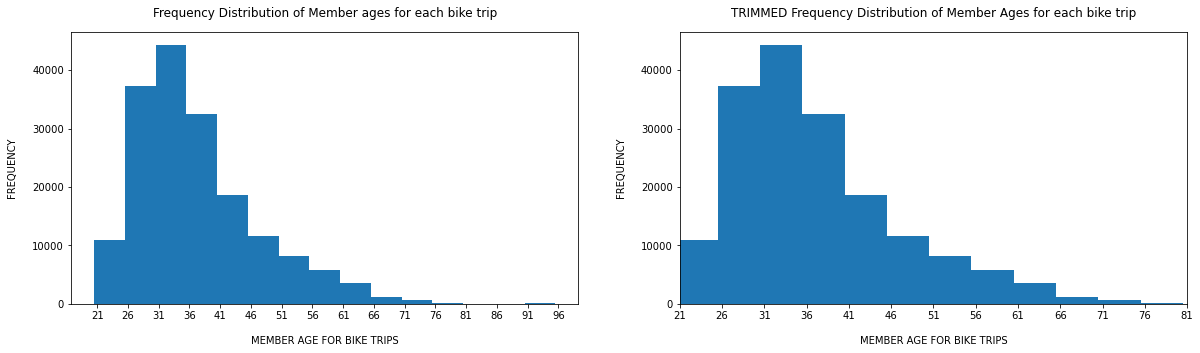

In [20]:
plt.figure(figsize=[20, 5])

plt.subplot(1,2,1)

bins = np.arange(20.5, df['member_age'].max()+5, 5)
plt.hist(data=df, x='member_age', bins=bins)

ticks = np.arange(21, 100, 5)
labels = ['{}'.format(x) for x in ticks]
plt.xticks(ticks, labels)
plt.title('Frequency Distribution of Member ages for each bike trip', pad=15)
plt.xlabel('MEMBER AGE FOR BIKE TRIPS', labelpad=15)
plt.ylabel('FREQUENCY', labelpad= 15);

plt.subplot(1,2,2)

bins = np.arange(20.5, df['member_age'].max()+5, 5)
plt.hist(data=df, x='member_age', bins=bins)

ticks = np.arange(21, 100, 5)
labels = ['{}'.format(x) for x in ticks]
plt.xticks(ticks, labels)
plt.title('TRIMMED Frequency Distribution of Member Ages for each bike trip', pad=15)
plt.xlabel('MEMBER AGE FOR BIKE TRIPS', labelpad=15)
plt.ylabel('FREQUENCY', labelpad= 15);
plt.xlim(21, 81);

The above are the frequency distributions for member ages for each bike trip. The distributions are right skewed with a peak at around 31 - 36 age groups. 

The histogram on the right has been trimmed to focus on the denser part of the histogram cutting out the extreme age groups of 91-96 and the non existent 0 - 20 age groups.

> I want to see the distribution of the start and end hours.

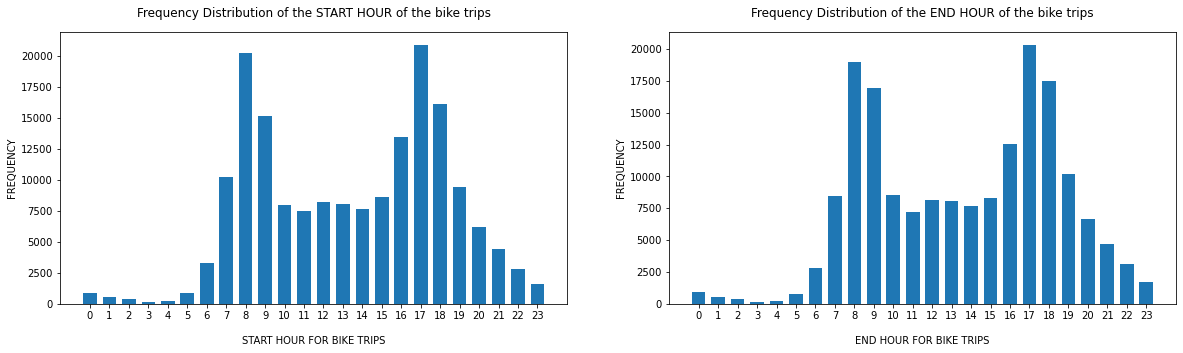

In [21]:
# plot the histogram for the "start hour" and "end hour" for bike trips

plt.figure(figsize=[20, 5])


plt.subplot(1, 2, 1)

bins = np.arange(-0.5, df['start_hour'].max()+1, 1)
plt.hist(data=df, x='start_hour', bins=bins, rwidth=0.7)

ticks = np.arange(0, 24)
labels = ['{}'.format(x) for x in ticks]
plt.xticks(ticks, labels)
plt.title('Frequency Distribution of the START HOUR of the bike trips', pad=15)
plt.xlabel('START HOUR FOR BIKE TRIPS', labelpad=15)
plt.ylabel('FREQUENCY');

plt.subplot(1, 2, 2)

bins = np.arange(-0.5, df['end_hour'].max()+1, 1)
plt.hist(data=df, x='end_hour', bins=bins, rwidth=0.7)

ticks = np.arange(0, 24)
labels = ['{}'.format(x) for x in ticks]
plt.xticks(ticks, labels)
plt.title('Frequency Distribution of the END HOUR of the bike trips', pad=15)
plt.xlabel('END HOUR FOR BIKE TRIPS', labelpad=15)
plt.ylabel('FREQUENCY');

The two distributions appear the same.

The histogram shows the frequency distribution for "start hour"  and "end hour" of the day for bike trips. It has two peaks(bimodal) at 08:00 and 17:00. Bike trips are taken more in the morning (07:00, 08:00, 09:00) and evening(16:00, 17:00, 18:00).Those are typical start hours and closing hours for work. Very few trips are taken in the early hours of the day.

> Next is the distribution of the duration(min) spent on each trip.

In [22]:
df.duration_min.describe()

count    174877.000000
mean         11.241839
std          27.376671
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

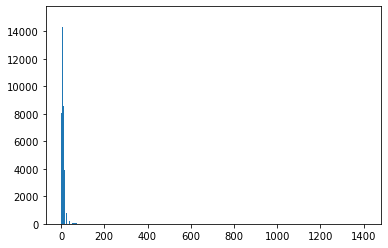

In [23]:
# distribution of the duration(min) for bike trips
plt.hist(data=df, x='duration_min', bins=2000);

(0.0, 40.0)

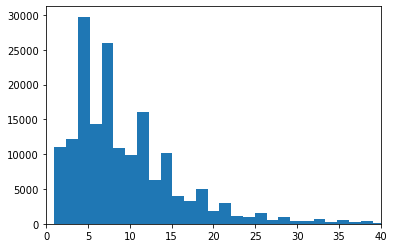

In [24]:
# distribution of the duration(min) for bike trips with the plot limit set at 40 mins for emphasis on the important details.
plt.hist(data=df, x='duration_min', bins=1000);
plt.xlim(0, 40)

> The duration distrubution has had to be transformed with the plot limit set at 40 mins to reveal that most trips have a duration of 40mins or less with a peak at 5mins. The distribution is right skewed.

> What is frequency of each trip for each day of the week?

In [25]:
def myCountPlot(df, xVar, color=sb.color_palette()[0], order=None, figsize=[14, 7]):
    
    '''
    A function to plot a countplot for qualitative data.
    inputs:
    df - the dataframe
    xVar - the qualitative variable
    
    '''
    
    if figsize:
        # set plot dimensions
        plt.figure(figsize=figsize)
    # plot
    sb.countplot(data=df, x=xVar, edgecolor='black', color=color, order=order)
    # cleaning variable after plotting
    xVar = xVar.replace("_", " ")  # replace _ with a space
    # Adding a title and formatting it.
    plt.title(f''' Distribution of {xVar}'''.title(), fontsize=14, weight='bold')
    # Add xlabel and format it.
    plt.xlabel(xVar.title(), fontsize=10, weight='bold')
    # Add ylabel and format it.
    plt.ylabel("Frequency".title(), fontsize=10, weight='bold')

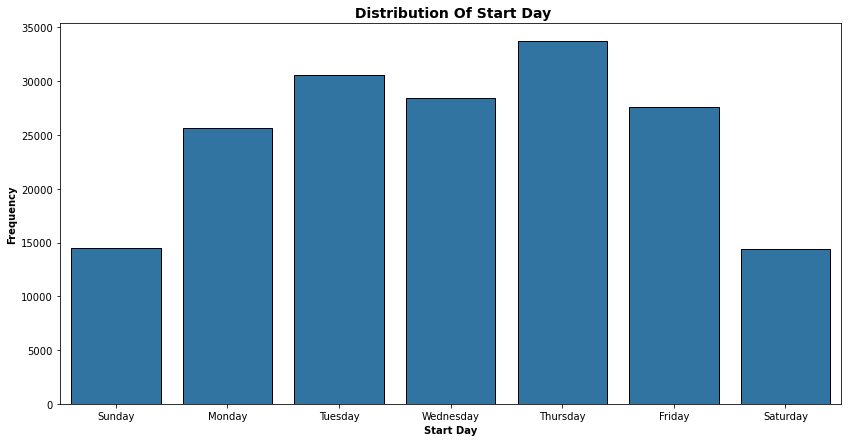

In [26]:
order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
myCountPlot(df, 'start_day', order=order)

> This bar chart depicts the frequency of bike trips based on the day of the week. Most trips occur on Tuesday, Wednesday and  Thursdays with peak on **Thursdays** and the least trips occur on **Sundays**. 

> More trips on weekdays than weekends.

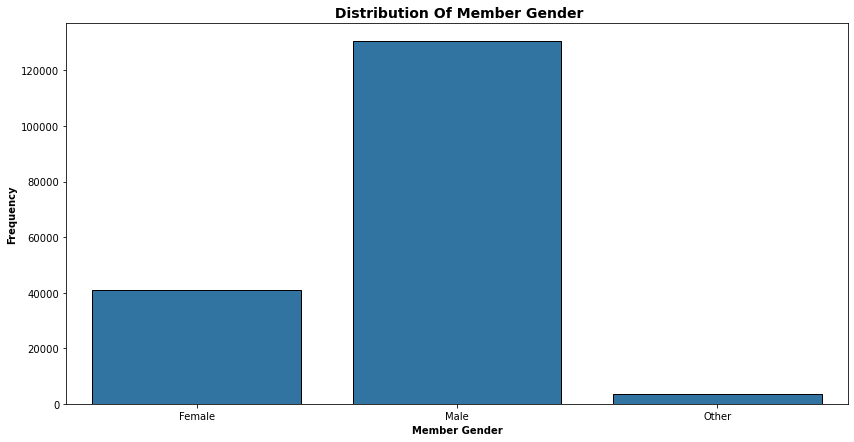

In [27]:
myCountPlot(df, 'member_gender')

> A larger number of users are males (over 120 000), about 40000 females and the 'Others' represent the least in the category

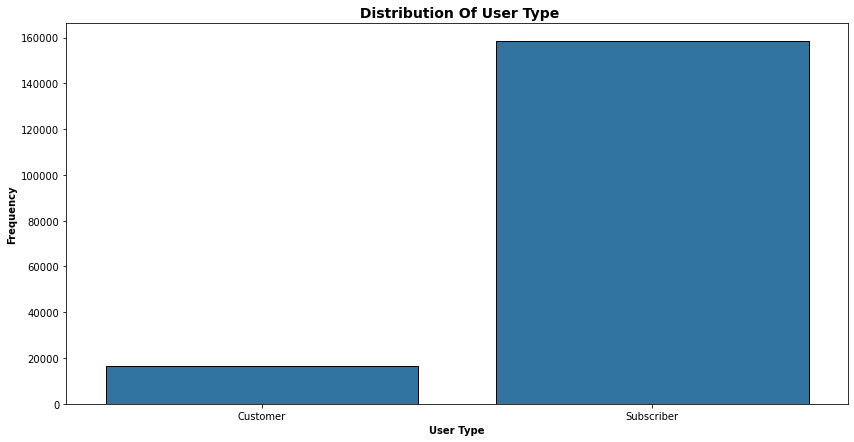

In [28]:
myCountPlot(df, 'user_type')

> This reveals that there are significantly fewer 'customers' with the larger proportion of users being 'Subscribers'.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For the duration(mins), most of the dataset < 40mins in addition to having extremely high values. The distribution was plotted with limit set at 40mins.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> None.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

> What is the Age distribution of different genders?

In [29]:
df['member_age'].groupby(df['member_gender']).describe()

,count,mean,std,min,25%,50%,75%,max
member_gender,,,,,,,,
Female,40791.0,36.194259,9.147854,21.0,30.0,34.0,40.0,89.0
Male,130440.0,37.415233,10.191123,21.0,30.0,35.0,42.0,95.0
Other,3646.0,38.877948,10.026969,22.0,32.0,37.0,43.0,94.0


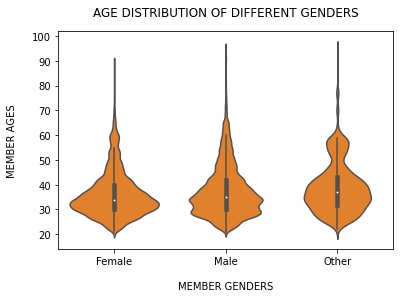

In [30]:
# Age distribution of different genders
color = sb.color_palette()[1]
sb.violinplot(data=df, x='member_gender', y='member_age', color=color)
plt.title('AGE DISTRIBUTION OF DIFFERENT GENDERS', pad=15)
plt.ylabel('MEMBER AGES', labelpad=15)
plt.xlabel('MEMBER GENDERS', labelpad=15);

> The average age of the males are higher than that of the females. The highest average age falls to the "other" group. The maximum age is a ***Male*** that is well above 90 years, while the minimum age is equal between the males and females at 21 years.

In [31]:
df['duration_min'].groupby(df['member_gender']).describe()

,count,mean,std,min,25%,50%,75%,max
member_gender,,,,,,,,
Female,40791.0,12.489250,29.787946,1.0,6.0,9.0,14.0,1386.0
Male,130440.0,10.714957,25.086806,1.0,5.0,8.0,12.0,1409.0
Other,3646.0,16.135765,58.780627,1.0,5.0,9.0,14.0,1375.0


> What gender spent more time with the bikes?

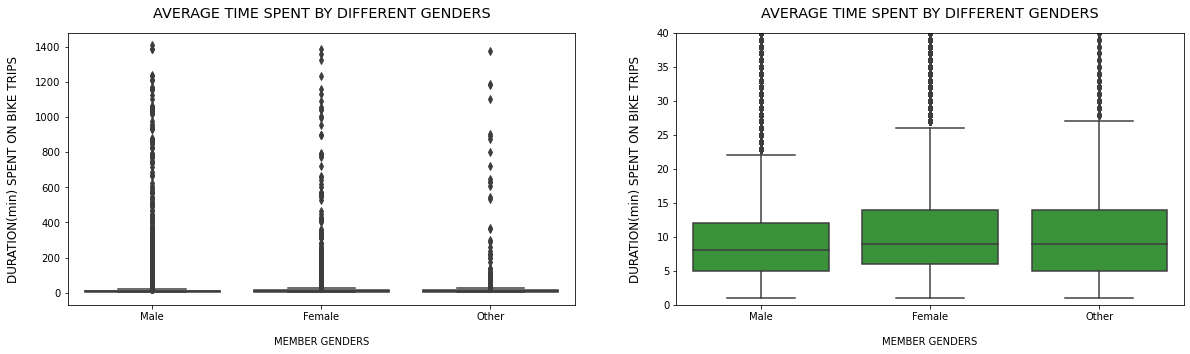

In [32]:
# Average duration (mins) spent on trips by different genders
plt.figure(figsize=[20, 5])

order = ['Male', 'Female', 'Other']
color = sb.color_palette()[2]

plt.subplot(1,2,1)

sb.boxplot(data=df, x='member_gender', y='duration_min', color=color, order=order)
plt.title('AVERAGE TIME SPENT BY DIFFERENT GENDERS', pad=15, fontdict={'fontsize':'x-large'})
plt.ylabel('DURATION(min) SPENT ON BIKE TRIPS', labelpad=15, fontdict={'fontsize':'large'})
plt.xlabel('MEMBER GENDERS', labelpad=15)

plt.subplot(1,2,2)
# I will set the y-axis(duration_min) limit to 40 mins using insight gained from univariate analysis.

sb.boxplot(data=df, x='member_gender', y='duration_min', color=color, order=order)
plt.title('AVERAGE TIME SPENT BY DIFFERENT GENDERS', pad=15, fontdict={'fontsize':'x-large'})
plt.ylabel('DURATION(min) SPENT ON BIKE TRIPS', labelpad=15, fontdict={'fontsize':'large'})
plt.xlabel('MEMBER GENDERS', labelpad=15)
plt.ylim([0, 40]);

> The left plot shows a very skewed plot towards the upper limits of the ranges but not capturing large parts of the data as inferred from the univariate analysis. However, it does show some snippets of information. The highest duration spent during a trip is by a "Male"

> The right plot shows a more representative data that caps the duration(mins) at 40 mins and shows the lowest average duration spent being by the "Males" and the highest by "Other".

In [33]:
''' 
I will divide the different member_age into different age groups e.g. 10-19, 20-29 etc.
This creates a new column from the existing member_age 

'''

labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

df['age_groups'] = pd.cut(df['member_age'], bins=[20, 30, 40, 50, 60, 70, 80, 90, 100], labels=labels)

df['age_groups'] = df['age_groups'].astype('category')

> What is the duration spent by different age groups?

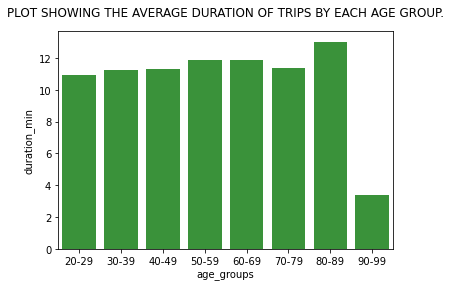

In [34]:
# average duration spent by different age groups
color = sb.color_palette()[2]
sb.barplot(data=df, x='age_groups', y='duration_min', ci=None, color=color)
plt.title("PLOT SHOWING THE AVERAGE DURATION OF TRIPS BY EACH AGE GROUP.", pad=15);

> Suprisingly, age group in the 80-89 range had the highest time on each trip. This may be due to their inability to cycle fast or as a means of exercise. The lowest time spent on trips also came from the highest age range in the 90-99 age range.
>The younger age groups spent some fair amount of time but smaller than the middle-age groups(50-59, 60-69)

> What is the gender distribution for different user types?

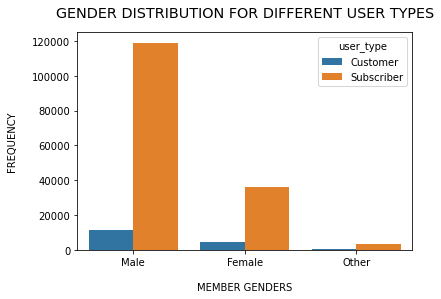

In [35]:
# gender distribution for different user types 

order = ['Male', 'Female', 'Other']
sb.countplot(data=df, x='member_gender', hue='user_type', order=order)
plt.title('GENDER DISTRIBUTION FOR DIFFERENT USER TYPES', pad=15, fontdict={'fontsize':'x-large'})
plt.xlabel('MEMBER GENDERS', labelpad=15)
plt.ylabel('FREQUENCY', labelpad=15);

> All of the genders have more 'subscribers' than 'customers'. Males have the most "subscribers" and "customers" with the least "subscribers" and "customers" in the "other" group. 

> What is the Age range for different user types?

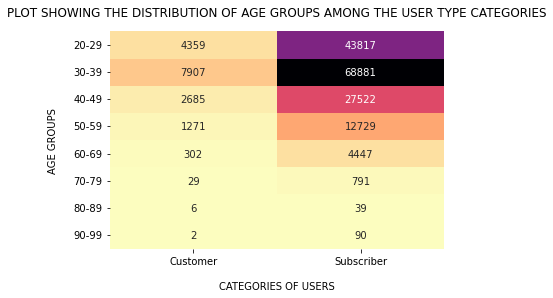

In [36]:
# AGE RANGE FOR DIFFERENT USER TYPES
sb.heatmap(pd.crosstab(df['age_groups'], df['user_type']), cmap='magma_r', annot=True, cbar=False, fmt='0.0f')
plt.title('PLOT SHOWING THE DISTRIBUTION OF AGE GROUPS AMONG THE USER TYPE CATEGORIES', pad=15)
plt.ylabel('AGE GROUPS', labelpad=15)
plt.xlabel('CATEGORIES OF USERS', labelpad=15);

> The heatmap above shows the distribution of age groups of the different categgories of bike ride users.
> There are more *subscribers* in the lower age groups with most falling in the 30-39 age group.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The average age of the Males were more than the females
> Age range with the highest subscribers were 30-39 age range.
> The 80-89 age group suprisingly had highest average duration spent for trips.
> The "other" gender had the highest amount of time spent on trips.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a disproportionate amount of 'Subscribers' relative to "Customers" for each of the gender.

## Multivariate Exploration



> What gender had the highest average duration trip during a weekday?

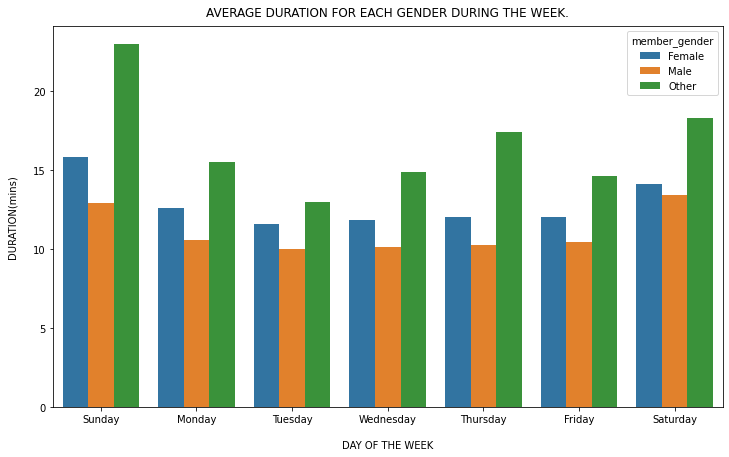

In [37]:
# Creating a barplot showing start_day against duration for each gender

plt.figure(figsize=(12, 7))
order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sb.barplot(data=df, x='start_day', y='duration_min', hue='member_gender', order=order, ci=None)
plt.xlabel("DAY OF THE WEEK", labelpad=16)
plt.ylabel("DURATION(mins)", labelpad=16)
plt.title('AVERAGE DURATION FOR EACH GENDER DURING THE WEEK.', pad=10);

> A barplot showing the average duration spent on the trips by each gender on every day of the week. "Other" gender on Sunday appear to have the highest duration spent on trips while "Females" on Tuesday have the lowest duration spent during the week.

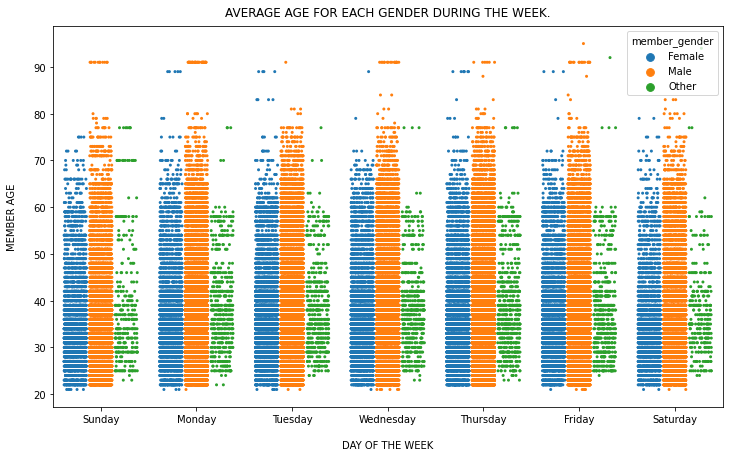

In [38]:
# Creating a stripplot showing start_day against member for each gender

plt.figure(figsize=(12, 7))
order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sb.stripplot(data=df, x='start_day', y='member_age', hue='member_gender', order=order, 
            size=3, jitter=0.35, dodge=True)
plt.xlabel("DAY OF THE WEEK", labelpad=16)
plt.ylabel("MEMBER AGE", labelpad=16)
plt.title('AVERAGE AGE FOR EACH GENDER DURING THE WEEK.', pad=10);

> Most of the age groups are represented everyday of the week for all the genders except the 80-90 age group that is sparsely represented for all genders.

(0.0, 40.0)

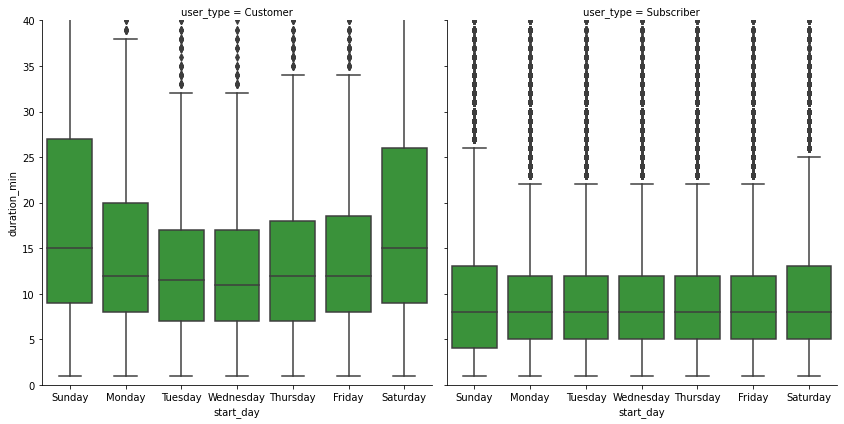

In [39]:
#using faceting to see the distribution of both duration along the days of the week for both customer and subscriber
base_color = sb.color_palette()[2]
order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
g = sb.FacetGrid(data = df, col = "user_type", height = 6 )
g.map(sb.boxplot, 'start_day', 'duration_min', order = order , color = base_color)
plt.ylim((0,40))

> The average duration for the subscribers are fairly consistent accross the week. However, for the customers, it is higher during the weekends and drops during the weekdays.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> A multivariate exploration of the relationship between average duration of trips and day of the week for each gender.
> The average duration spent on trips were higher on weekends. 
> The females on every day of the week spent less average time relative to other genders.

### Were there any interesting or surprising interactions between features?

> The consistency in the average duration spent on trips. It was consistently Other > Female > Male for everyday of the week. Perhaps the Males don't fancy travelling longer trips on bikes or are able to cycle faster!

## Conclusions


- Most of the riders were within the 31 - 36 age group
- Most trips were less than 40 mins
- Most trips were taken on Thursdays.
- Most riders are Males
- Most of the riders are "Subscribers"
- The average age of the males are higher than that of the females. 
- Highest duration of trips taken were by older riders in the 80-89 age group.
- Males spent a higher average amount of time on trips relative to females for everyday of the week.